# Projet Final Apprentissage automatique pour données massives

Equipe : Yann, Alix, Florian, Thomas

# Partie 0 : Import des données

In [ ]:
from datasets import load_dataset
import pandas as pd
import os
import requests
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("DBQ/Chanel.Product.prices.Germany")


c:\Users\tgour\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['website_name', 'competence_date', 'country_code', 'currency_code', 'brand', 'category1_code', 'category2_code', 'category3_code', 'product_code', 'title', 'itemurl', 'imageurl', 'full_price', 'price', 'full_price_eur', 'price_eur', 'flg_discount'],
        num_rows: 1428
    })
})

In [ ]:
df = dataset["train"].to_pandas()


# Partie 1 : Analyse approfondie du jeu de données

## Observations générales

In [ ]:
df.head()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0,0
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0,0
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0,0
3,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,580.0,580.0,580.0,0
4,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,480.0,480.0,480.0,0


Ceci nous donne une première idée du Dataset.

In [ ]:
df.info()
print("\nTaux de valeurs manquantes par colonne (%):")
print((df.isna().mean() * 100).round(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

Ceci nous donne le type de chaque colonne, combien de valeurs non nulles, et le pourcentage de NaN par colonne.

Selon df.info() et le taux de valeurs manquantes, aucune colonne ne contient de valeurs manquantes au sens strict (NaN). Cependant, certaines colonnes (par exemple category3_code) utilisent la chaîne de caractères "N.A." pour représenter une absence d’information, ce qui peut être assimilé à une valeur manquante d’un point de vue sémantique.

In [ ]:
df.describe(include='all')

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
count,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428.000000,1428.000000,1428.000000,1428.000000,1428.0
unique,1,1,1,1,1,7,51,1,1428,824,1428,1383,NaN,NaN,NaN,NaN,NaN
top,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,READY-TO-WEAR,N.A.,PAS4152B13455,18 Karat Weißgold Diamanten,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,NaN,NaN,NaN,NaN,NaN
freq,1428,1428,1428,1428,1428,550,243,1428,1,68,1,46,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6076.253725,6076.253725,6076.253725,6076.253725,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219.005999,15219.005999,15219.005999,15219.005999,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,23.000000,23.000000,23.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.000000,195.000000,195.000000,195.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415.000000,1415.000000,1415.000000,1415.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5800.000000,5800.000000,5800.000000,5800.000000,0.0


Ici, on remarque plusieurs choses intéréssantes :

1. Les colonnes website_name, competence_date, country_code, currency_code, brand, category3_code ne sont pas très utiles : elles ont la même valeur sur toutes les lignes sans exceptions. Ces colonnes sont surtout métadonnées → utiles à décrire le jeu de données, mais pas informatives pour l’apprentissage (aucune variance). On pourra les exclure des features pour les modèles d’embeddings / reco.
2. Tous les product_code, itemurl sont bien différents.
3. Il y a des titres en communs, dont "18 Karat Weißgold Diamanten" qui revient jusqu'à 68 fois.
4. Il y a également des imageurl qui reviennent plusieurs fois (jusqu'à 46 fois)
5. Il semble que full_price, price, full_price_eur, price_eur soient 4 fois la même colonne.
6. Il semble aussi que flg_discount ne soient que des 0.

In [ ]:
diff = (
    (df["price"] != df["full_price"]) |
    (df["price_eur"] != df["price"]) |
    (df["full_price_eur"] != df["price_eur"])
)
diff.sum()

np.int64(0)

On peut conffirmer que les 4 colonnes sont strictement identiques. Nous allons donc précéder à la suppression de toutes les colonnes inutiles :

In [ ]:
# Drop specified columns in-place
df.drop(columns=['website_name', 'competence_date', 'country_code', 'currency_code', 'brand', 'category3_code', 'full_price', 'full_price_eur', 'price_eur', 'flg_discount'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category1_code  1428 non-null   object 
 1   category2_code  1428 non-null   object 
 2   product_code    1428 non-null   object 
 3   title           1428 non-null   object 
 4   itemurl         1428 non-null   object 
 5   imageurl        1428 non-null   object 
 6   price           1428 non-null   float64
dtypes: float64(1), object(6)
memory usage: 78.2+ KB


## Category1_code

Commençons par regarder la colonne category1_code :

In [ ]:
cat1_counts = (
    df["category1_code"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "category1_code", "category1_code": "count"})
)
print("Table: category1_code value counts")
display(cat1_counts)

Table: category1_code value counts


,count,count
0,FASHION,550
1,FRAGRANCE,199
2,JEWELRY,193
3,EYEWEAR,163
4,MAKEUP,121
5,SKINCARE,104
6,WATCHES,98


Voici un tableau de toutes les différentes valeurs de category1_code et leur nombre d'apparitions. Le but ici est de vérifier qu'il n'y a pas de "N.A." par exemple.

## Category2_code

On passe maintenant à l'observation de la colonne category2_code :

In [ ]:
cat2_counts = (
    df["category2_code"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "category2_code", "category2_code": "count"})
)

cat2_counts["percentage"] = (
    df["category2_code"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index(drop=True)
)

print("Table: category2_code value counts")
display(cat2_counts)

Table: category2_code value counts


,count,count,percentage
0,READY-TO-WEAR,243,17.02
1,COSTUME JEWELRY,127,8.89
2,SUNGLASSES,99,6.93
3,WOMEN,88,6.16
4,WATCHES,87,6.09
5,MEN,72,5.04
6,HANDBAGS,61,4.27
7,COCO CRUSH,54,3.78
8,SHOES,42,2.94
9,FACE,41,2.87


Pareil ici : un tableau de toutes les différentes valeurs de category2_code et leur nombre d'apparitions et on vérifie qu'il n'y a pas de "N.A.".

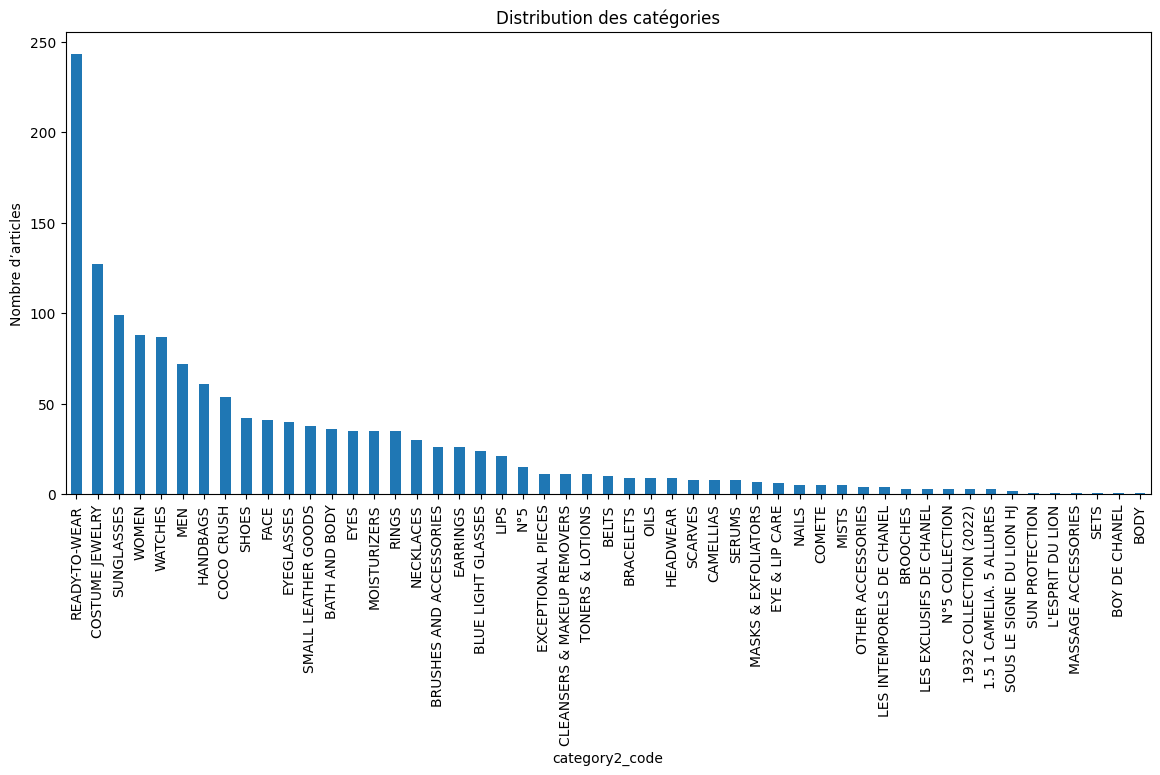

In [ ]:
plt.figure(figsize=(14,6))
df['category2_code'].value_counts().plot.bar()
plt.title("Distribution des catégories")
plt.xlabel("category2_code")
plt.ylabel("Nombre d’articles")
plt.show()


### Analyse de la distribution des catégories

On observe que la répartition des catégories est fortement déséquilibrée.  
Les catégories **READY-TO-WEAR**, **COSTUME JEWELRY**, **SUNGLASSES**, **WATCHES** et **WOMEN** représentent à elles seules **plus de 50 % de l’ensemble du catalogue**.

Cela indique que le dataset est dominé par quelques familles de produits, tandis qu’une grande quantité de catégories disposent seulement de quelques exemples.  

Ce déséquilibre pourrait entraîner des biais lors de l’entraînement des modèles de classification ou de recommandation.


## Imageurl

On se concentre maintenant sur imageurl

In [ ]:
img_counts = (
    df.groupby("imageurl")
      .size()
      .reset_index(name="count")
)
img_counts_duplicated = img_counts[img_counts["count"] > 1]\
                          .sort_values("count", ascending=False)

print("Table: imageurl duplicated (count > 1)")
display(img_counts_duplicated)

Table: imageurl duplicated (count > 1)


,imageurl,count
1382,https://res.cloudinary.com/dwayrkp5z/image/fet...,46


On commence de la même manière : on va regarder toutes les valeurs de imageurl qui sont différentes MAIS qui apparaissent + d'1 fois cette fois ci. Le raisonnement est le suivant : pendant que je m'occupe de cette partie, l'un d'entre nous est entrain de faire un script pour télécharger les images depuis les liens. Les liens qui ne sont donc pas fonctionels (type "N.A.") seront donc de toute façon repérés à cette étape. Ici, nous regardons si certains liens apparaissent plusieurs fois. Et la réponse est oui. On s'en était douté plus tôt lors de la description des colonnes. Il esxiste un lien, qui apparait 46 fois.

In [ ]:
# On prend l'URL la plus fréquente (celle avec le count max)
top_imageurl = (
    img_counts_duplicated
    .sort_values("count", ascending=False)
    ["imageurl"]
    .iloc[0]
)

print(top_imageurl)

https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a.


In [ ]:
# Filtrer les lignes ayant exactement cette imageurl
mask = df["imageurl"] == top_imageurl
rows_same_image = df.loc[mask, ["product_code", "title", "imageurl"]]

# Afficher toutes les lignes correspondantes
display(rows_same_image)

# Récupérer uniquement les product_code (éventuellement uniques)
product_codes = rows_same_image["product_code"].unique()

print("Product codes utilisant cette imageurl :")
print(product_codes)
print("Nombre de product_code distincts :", len(product_codes))

# Juste le tout premier ID :
first_product_code = product_codes[0]
print("Premier product_code :", first_product_code)


,product_code,title,imageurl
1,PA67085Y09953,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
58,PAA9624B14802,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
83,PG31318B14610,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
92,PAS3261B14471,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
102,PG02819Y01552,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
104,PG45335B14498,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
112,PAA9624B14805,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
189,PAA9624B14804,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
337,PG02819B14615,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...
339,PG31318Y50006,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...


Product codes utilisant cette imageurl :
['PA67085Y09953' 'PAA9624B14802' 'PG31318B14610' 'PAS3261B14471'
 'PG02819Y01552' 'PG45335B14498' 'PAA9624B14805' 'PAA9624B14804'
 'PG02819B14615' 'PG31318Y50006' 'PG31319B14615' 'PG45220B14232'
 'PAA9476B14214' 'PAA9624B14806' 'PG29762X01000' 'PAS4051B14480'
 'PAS1161B14552' 'PG31319Y50006' 'PAP0213Y01864' 'PP75181V66865'
 'PA01112Y01295' 'PA37586Y04634' 'PG02819B14610' 'PA35200Y04059'
 'PAS4388B14299' 'PAS4051B14446' 'PAS4388B14301' 'PA69900B13280'
 'PP75338K10824' 'PA01112B12979' 'PG45220B14084' 'PG45289B14502'
 'PAS1160B07327' 'PP75267V66800' 'PAS3980B14407' 'PA69900Y04059'
 'PA01113Y01864' 'PAA9476B14213' 'PAS3261B13369' 'PAS3261B14797'
 'PAP0250Y01480' 'PAP3267B14552' 'PAS4051B14445' 'PG31319B14620'
 'PP75251V66955' 'PP75166V66807']
Nombre de product_code distincts : 46
Premier product_code : PA67085Y09953


Nous savons donc maintenant que le lien https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/n.a. apparait 46 fois, avec tous ces produits : ['PA67085Y09953' 'PAA9624B14802' 'PG31318B14610' 'PAS3261B14471' 'PG02819Y01552' 'PG45335B14498' 'PAA9624B14805' 'PAA9624B14804' 'PG02819B14615' 'PG31318Y50006' 'PG31319B14615' 'PG45220B14232' 'PAA9476B14214' 'PAA9624B14806' 'PG29762X01000' 'PAS4051B14480' 'PAS1161B14552' 'PG31319Y50006' 'PAP0213Y01864' 'PP75181V66865' 'PA01112Y01295' 'PA37586Y04634' 'PG02819B14610' 'PA35200Y04059' 'PAS4388B14299' 'PAS4051B14446' 'PAS4388B14301' 'PA69900B13280' 'PP75338K10824' 'PA01112B12979' 'PG45220B14084' 'PG45289B14502' 'PAS1160B07327' 'PP75267V66800' 'PAS3980B14407' 'PA69900Y04059' 'PA01113Y01864' 'PAA9476B14213' 'PAS3261B13369' 'PAS3261B14797' 'PAP0250Y01480' 'PAP3267B14552' 'PAS4051B14445' 'PG31319B14620' 'PP75251V66955' 'PP75166V66807'].

Cependant, nous nous rendrons compte plus tard (lors du script pour télécharger toutes les images) que des 1383 liens distincts d'image, seulement 900 nous redirigent effectivement sur des images exploitables, et par chance, le lien qui apparait 46 fois n'en fait pas partie, nous n'aurons donc pas à gérer d'avantage ce cas.

### Import des images

Nous allons donc télécharger les images à l'aide d'un script. Les images seront stockées dans un dossier Images et on travaillera avec un un dataframe contenant les noms des images. Leurs noms est leur product_id. Enfin on créer un fichier csv pour eviter de re-télécharger les images.

In [ ]:
if os.path.exists('data_images.csv') and os.path.exists('Images') and os.path.isdir('Images'):
    df_images = pd.read_csv('data_images.csv')

else:

    url_column = "imageurl"

    # 2. Créer un dossier pour stocker les images
    output_dir = "Images"
    os.makedirs(output_dir, exist_ok=True)

    valid_rows = []  # stocke les lignes valides
    image_paths = [] # stocke les chemins d'images valides

    # 3. Télécharger chaque image
    for idx, url in tqdm(df[url_column].items(), total=len(df), desc="Téléchargement images"):
        if pd.isna(url):
            continue

        # Accès direct au product_code
        product_code = df.loc[idx, 'product_code']
        name = f"{product_code}.jpg"
        filename = os.path.join(output_dir, name)

        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            # Sauvegarde de l'image
            with open(filename, "wb") as f:
                f.write(response.content)

            # Ligne valide → on stocke la ligne + chemin
            valid_rows.append(idx)
            image_paths.append(name)

        except:
            # Pas d'affichage d'erreur (totalement silencieux)
            pass

    # 4. Nettoyage : garder uniquement les bonnes lignes
    df_images = df.loc[valid_rows].reset_index(drop=True)

    # Ajout de la colonne image_path
    df_images["image"] = image_paths

    # 5. Sauvegarde du dataset propre
    df_images.to_csv("data_images.csv", index=False)

    print("✔ Téléchargement terminé")
    print(f"✔ Lignes valides conservées : {len(df_images)}")
    print("✔ Chemins d'images ajoutés dans la colonne 'image_path'")
    print("✔ Dataset nettoyé : data_clean.csv")

On visulatise le dataset avec les images

In [ ]:
df_images

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,PAS4152B13455.jpg
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,PA71441.jpg
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,PA71449.jpg
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,PA71466.jpg
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X021...,https://res.cloudinary.com/dwayrkp5z/image/fet...,620.0,PA71481.jpg
...,...,...,...,...,...,...,...,...
895,FASHION,READY-TO-WEAR,PP75365K10782,Kaschmir & Mohair Beige Schwarz & Korallenrosa,https://www.chanel.com/de/mode/p/P75365K10782N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,2750.0,PP75365K10782.jpg
896,MAKEUP,BRUSHES AND ACCESSORIES,PP137500,TASCHENSPIEGEL MIT ZWEI FACETTEN,https://www.chanel.com/de/make-up/p/137500/mir...,https://res.cloudinary.com/dwayrkp5z/image/fet...,35.0,PP137500.jpg
897,MAKEUP,BRUSHES AND ACCESSORIES,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,PP138848.jpg
898,SKINCARE,TONERS & LOTIONS,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,PP140650.jpg


On créer une fonction permettant d'augmenter notre dataframe avec les données des images (Canaux, mode, taille, poid)

In [ ]:
def get_image_info(image):
    try:
        path = f"Images/{image}"
        with Image.open(path) as img:
            return {
                'format': img.format,            # JPEG, PNG, etc.
                'mode': img.mode,                # RGB, L, etc.
                'width': img.width,
                'height': img.height,
                'size_bytes': os.path.getsize(path)  # taille en octets
            }
    except Exception as e:
        print(f"Erreur avec {image}: {e}")
        return {
            'format': None,
            'mode': None,
            'width': None,
            'height': None,
            'size_bytes': None
        }

In [ ]:
# Appliquer la fonction à chaque image
info_list = df_images['image'].apply(get_image_info)

# Convertir la liste de dictionnaires en DataFrame et concaténer
df_info = pd.concat([df_images, pd.DataFrame(info_list.tolist())], axis=1)



In [ ]:
df_info

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,format,mode,width,height,size_bytes
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,PAS4152B13455.jpg,JPEG,RGB,378,400,24238
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,PA71441.jpg,JPEG,RGB,378,400,6802
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,PA71449.jpg,JPEG,RGB,378,400,5307
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,PA71466.jpg,JPEG,RGB,378,400,6991
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X021...,https://res.cloudinary.com/dwayrkp5z/image/fet...,620.0,PA71481.jpg,JPEG,RGB,378,400,7456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,FASHION,READY-TO-WEAR,PP75365K10782,Kaschmir & Mohair Beige Schwarz & Korallenrosa,https://www.chanel.com/de/mode/p/P75365K10782N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,2750.0,PP75365K10782.jpg,JPEG,RGB,340,400,18075
896,MAKEUP,BRUSHES AND ACCESSORIES,PP137500,TASCHENSPIEGEL MIT ZWEI FACETTEN,https://www.chanel.com/de/make-up/p/137500/mir...,https://res.cloudinary.com/dwayrkp5z/image/fet...,35.0,PP137500.jpg,JPEG,RGB,188,274,7143
897,MAKEUP,BRUSHES AND ACCESSORIES,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,PP138848.jpg,JPEG,RGB,68,370,5056
898,SKINCARE,TONERS & LOTIONS,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,PP140650.jpg,JPEG,RGB,127,290,4872


On s'interesse seulement aux données des images

In [ ]:
df_info_images = df_info[['image', 'format', 'mode', 'width', 'height', 'size_bytes']]

In [ ]:
df_info_images[['width', 'height']].value_counts()

width  height
378    400       375
389    400       189
302    400        25
340    400        19
341    400        12
                ... 
61     332         1
63     225         1
       326         1
64     195         1
20     342         1
Name: count, Length: 259, dtype: int64

In [ ]:
df_info_images['mode'].value_counts()

mode
RGB    900
Name: count, dtype: int64

In [ ]:
df_info_images['format'].value_counts()

format
JPEG    900
Name: count, dtype: int64

On confirme dans la partie suivante que l'url apparaissant 46 fois n'est pas présente dans le dataframe avec les images

In [ ]:
codes = [
    'PA67085Y09953', 'PAA9624B14802', 'PG31318B14610', 'PAS3261B14471',
    'PG02819Y01552', 'PG45335B14498', 'PAA9624B14805', 'PAA9624B14804',
    'PG02819B14615', 'PG31318Y50006', 'PG31319B14615', 'PG45220B14232',
    'PAA9476B14214', 'PAA9624B14806', 'PG29762X01000', 'PAS4051B14480',
    'PAS1161B14552', 'PG31319Y50006', 'PAP0213Y01864', 'PP75181V66865',
    'PA01112Y01295', 'PA37586Y04634', 'PG02819B14610', 'PA35200Y04059',
    'PAS4388B14299', 'PAS4051B14446', 'PAS4388B14301', 'PA69900B13280',
    'PP75338K10824', 'PA01112B12979', 'PG45220B14084', 'PG45289B14502',
    'PAS1160B07327', 'PP75267V66800', 'PAS3980B14407', 'PA69900Y04059',
    'PA01113Y01864', 'PAA9476B14213', 'PAS3261B13369', 'PAS3261B14797',
    'PAP0250Y01480', 'PAP3267B14552', 'PAS4051B14445', 'PG31319B14620',
    'PP75251V66955', 'PP75166V66807'
]

df_images['product_code'].isin(codes).value_counts()

product_code
False    900
Name: count, dtype: int64

On remarque ici que les 46 urls présents ne le sont plus

On créer une fonction permettant de transformer toutes nos images en des images standardisées en RGB et en JEPG.

In [ ]:
output_dir_clean = "Images"
os.makedirs(output_dir_clean, exist_ok=True)

for idx, image in enumerate(df_images['image']):
    try:
        img = Image.open(f"Images/{image}")
        img_rgb = img.convert('RGB')  # convertit en RGB
        # Accès direct au product_code
        product_code = df_images.loc[idx, 'product_code']
        filename = os.path.join(output_dir_clean, f"{product_code}.jpg")
        img_rgb.save(filename, format='JPEG')  # sauvegarde l'image en JPEG
    except Exception as e:
        print(f"Erreur avec {image}: {e}")

## Title

Passons maintenant à l'exploration de la colonne title

In [ ]:
# Table: titres qui apparaissent plus d'une fois + leur nombre d'apparitions
title_counts = (
    df_images.groupby("title")
      .size()
      .reset_index(name="count")
)

title_counts_duplicated = (
    title_counts[title_counts["count"] > 1]
    .sort_values("count", ascending=False)
)

# Afficher jusqu'à 500 lignes (par ex. ; mets None pour tout)
pd.set_option("display.max_rows", 500)
# Ne pas tronquer le texte dans les colonnes
pd.set_option("display.max_colwidth", None)

print("Table: title duplicated (count > 1)")
display(title_counts_duplicated)
print(title_counts_duplicated.shape)

Table: title duplicated (count > 1)


,title,count
479,Schwarz. Gläser: Grau Mit Verlauf,17
470,Schwarz,13
484,Schwarz. Gläser: Transparent,11
2,18 Karat Weißgold Diamanten,10
478,Schwarz. Gläser: Grau,9
124,EAU DE TOILETTE ZERSTÄUBER,8
96,DEODORANT SPRAY,7
288,LES EXCLUSIFS DE CHANEL - EAU DE PARFUM,6
344,Metall Glasperlen & Strass Goldfarben Perlmuttweiß & Kristall,6
362,Metall Lammleder & Strass Goldfarben Schwarz & Kristall,6


(145, 2)


On voit ici qu'il y'a 145 titres qui apparaissent +d'1 fois. Il y avait précédement plusieurs dizaines de lignes ayant pour titre "N.A" mais celles ci on été supprimées au moment de la réduction du dataset pour avoir uniquement des images valides.

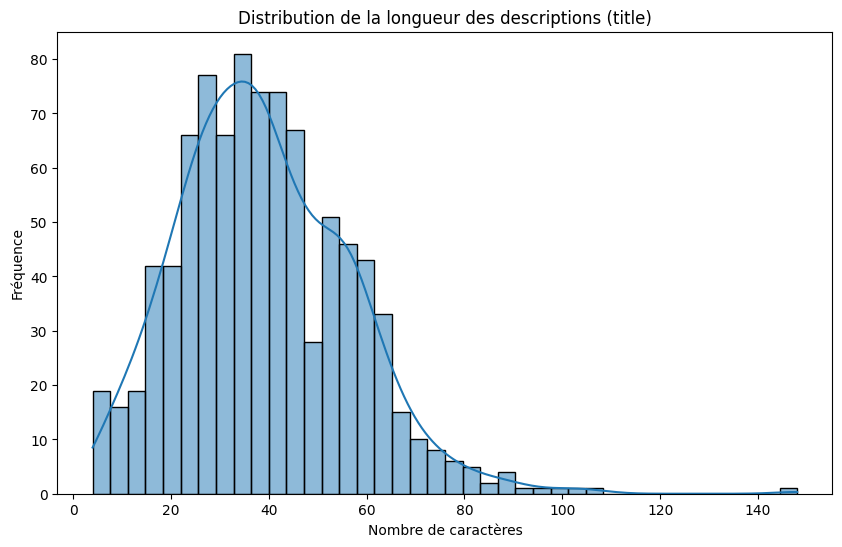

count    900.000000
mean      39.032222
std       17.462436
min        4.000000
25%       27.000000
50%       37.000000
75%       51.000000
max      148.000000
Name: title_len, dtype: float64

In [ ]:
df_images['title_len'] = df_images['title'].astype(str).str.len()

plt.figure(figsize=(10,6))
sns.histplot(df_images['title_len'], bins=40, kde=True)
plt.title("Distribution de la longueur des descriptions (title)")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

df_images['title_len'].describe()


### Analyse de la longueur des descriptions (title)

La plupart des titres de produits sont relativement courts : la majorité se situe entre **20 et 40 caractères**. La distribution est asymétrique, avec une longue traîne de titres plus détaillés mais beaucoup plus rares.

Cela suggère que les descriptions textuelles ne sont pas de véritables descriptions marketing complètes, mais plutôt des noms de produits.  

Ce manque d’information textuelle pourrait limiter la richesse des embeddings textuels et leur capacité à capturer les différences entre produits très similaires au sein d’une même catégorie.

## Price

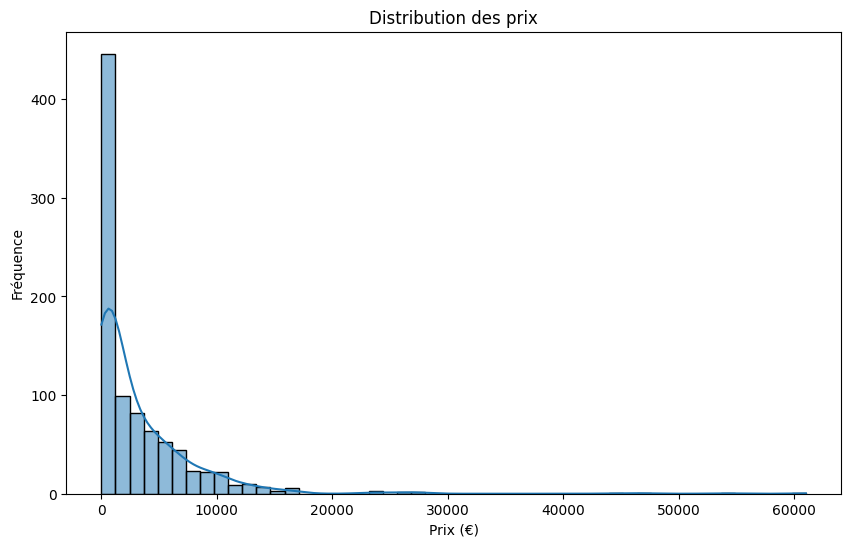

count      900.000000
mean      3239.513689
std       5151.902095
min         23.000000
25%        380.000000
50%       1275.000000
75%       4700.000000
max      61000.000000
Name: price, dtype: float64

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_images['price'], bins=50, kde=True)
plt.title("Distribution des prix")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_images['price'].describe()


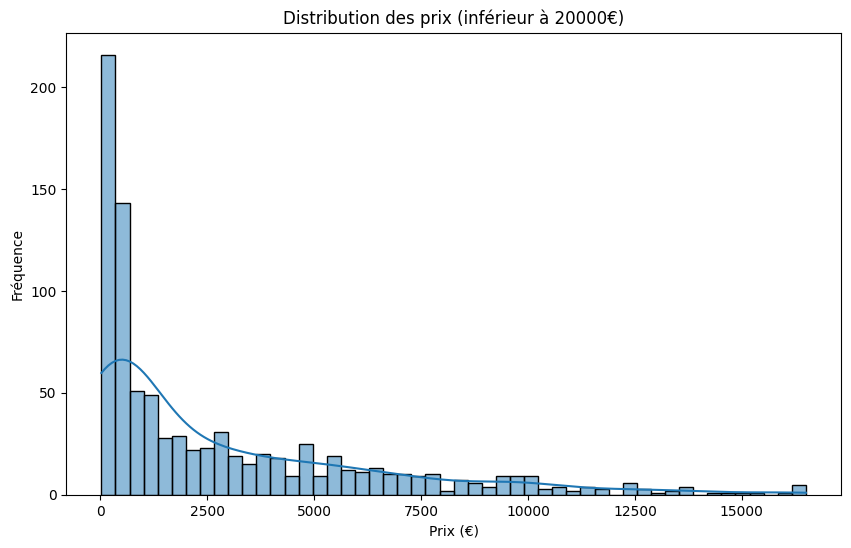

count      889.000000
mean      2846.864252
std       3475.395525
min         23.000000
25%        360.000000
50%       1240.000000
75%       4450.000000
max      16500.000000
Name: price, dtype: float64

In [ ]:
df_filtered = df_images[df_images['price'] < 20000]

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title("Distribution des prix (inférieur à 20000€)")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

df_filtered['price'].describe()

### Analyse de la distribution des prix

La distribution des prix est fortement asymétrique : la plupart des produits se situent dans une gamme de prix relativement accessible pour une marque de luxe, tandis qu’une portion très limitée d’articles très haut de gamme génère une longue traîne de prix élevés.

La médiane se situe à **1240 €**, ce qui signifie que **la moitié des produits coûtent moins de ce montant**, tandis que la moyenne est tirée vers le haut par des prix extrêmes atteignant **16 500 €**.  

Cette hétérogénéité du prix devra être prise en compte, notamment via des transformations (log-scale) pour éviter que les outliers ne perturbent les modèles.


## Préparation des données

#### Redimensionnement des images

In [ ]:
from PIL import Image
import shutil

input_dir = "Images"
output_dir = "Images_resized"

# Supprime et recrée le dossier output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

img_dim = (256, 256) # Taille à définir

print("Starting resizing")

for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = Image.open(img_path)
    img_resized = img.resize(img_dim)

    out_path = os.path.join(output_dir, filename)
    img_resized.save(out_path)

print("Resizing done !")

Starting resizing
Resizing done !


#### Augmentation des données

In [ ]:
import tensorflow as tf

# Création du pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(factor=0.2),
])

In [ ]:
input_dir = "Images_resized"
output_dir = "Images_aug"

# Supprime et recrée le dossier output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

df_aug = pd.DataFrame(columns=df_images.columns) # nouveau dataframe

n_aug = 4 # Nombre d'images à créer
image_idx = "image"

for idx, row in tqdm(df_images.iterrows()):
    filename = row[image_idx]             # ex: "img_001.jpg"
    img_path = os.path.join(input_dir, filename)
    name, ext = os.path.splitext(filename)
    img = Image.open(img_path)            # ouvre la bonne image

    img_array = tf.keras.utils.img_to_array(img)
    img_batch = tf.expand_dims(img_array, 0)

    out_name = f"{name}_0{ext}"
    out_path = os.path.join(output_dir, out_name)
    img.save(out_path)

    new_row = row.copy()
    new_row[image_idx] = out_name
    df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)

    for i in range(1, n_aug + 1):
        out_img_name = f"{name}_{i}{ext}"
        aug_img = data_augmentation(img_batch)[0].numpy()
        out_path = os.path.join(output_dir, out_img_name)
        tf.keras.utils.save_img(out_path, aug_img) # sauvegarde dans le dossier

        # Ajoute une ligne dans le nouveau dataframe
        new_row = row.copy()
        new_row[image_idx] = out_img_name
        df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)

0it [00:00, ?it/s]C:\Users\tgour\AppData\Local\Temp\ipykernel_10220\966341163.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aug = pd.concat([df_aug, pd.DataFrame([new_row])], ignore_index=True)
900it [00:59, 15.04it/s]


In [ ]:
df_aug

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,title_len
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_0.jpg,53
1,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_1.jpg,53
2,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_2.jpg,53
3,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_3.jpg,53
4,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_4.jpg,53
...,...,...,...,...,...,...,...,...,...
4495,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique-vue4-as4280b1369310601-9529173606430.jpg",5400.0,PAS4280B13693_0.jpg,38
4496,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique-vue4-as4280b1369310601-9529173606430.jpg",5400.0,PAS4280B13693_1.jpg,38
4497,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dw

## Visualisation des exemples des produits pour chaque catégorie majeure

['FASHION' 'EYEWEAR' 'JEWELRY' 'MAKEUP' 'FRAGRANCE' 'WATCHES' 'SKINCARE']
PAP3575B14310_4.jpg
PAA9238B13591_2.jpg


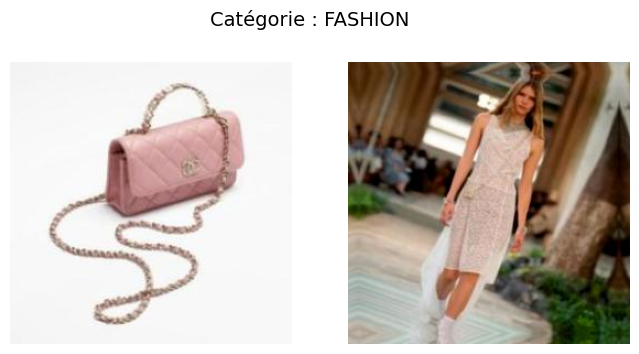

PA75273_3.jpg
PA75267_1.jpg


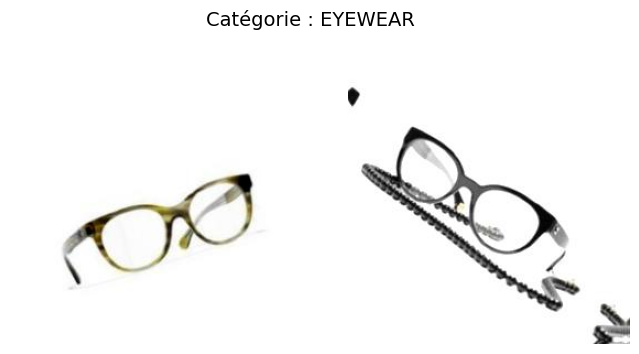

PJ10814_1.jpg
PJ12375_3.jpg


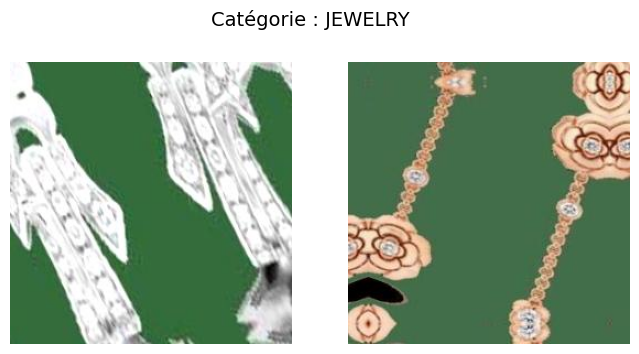

PP138857_1.jpg
PP182350_4.jpg


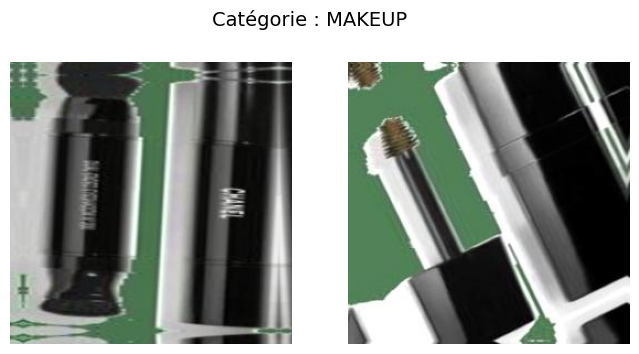

PP105728_1.jpg
PP126777_0.jpg


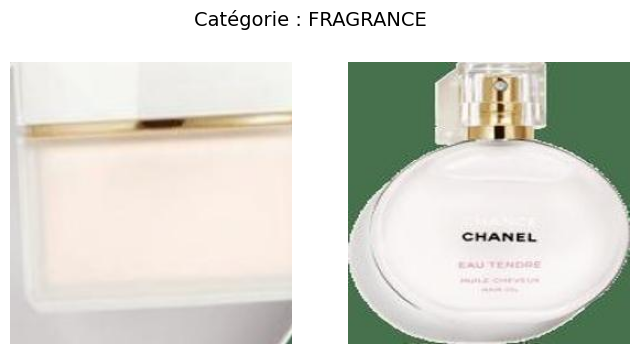

PPH5144_2.jpg
PPH6345_2.jpg


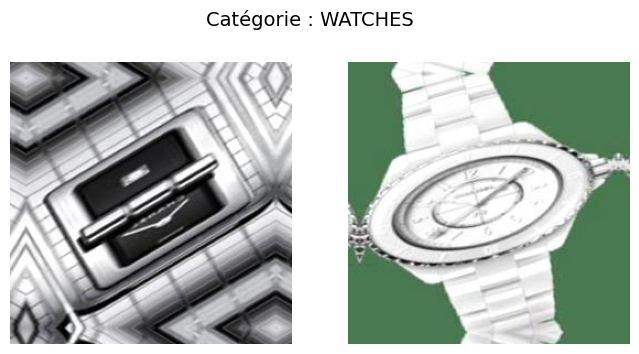

PP141480_4.jpg
PP195050_4.jpg


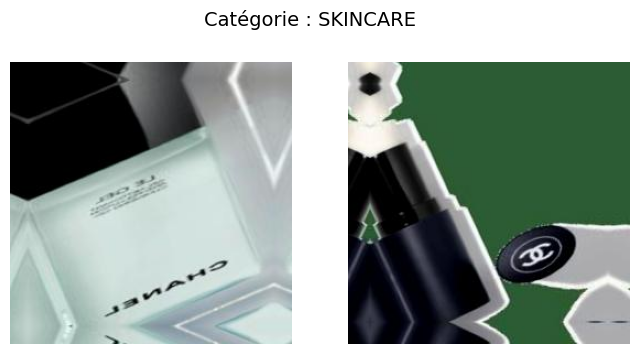

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Liste des catégories uniques
categories = df_aug['category1_code'].unique()
print(categories)

# Parcours des catégories
for cat in categories:
    subset = df_aug[df_aug['category1_code'] == cat]

    # Prendre 2 images aléatoires
    sample_images = subset.sample(min(2, len(subset)))

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f"Catégorie : {cat}", fontsize=14)

    for ax, (_, row) in zip(axes, sample_images.iterrows()):
        img = Image.open(f"Images_aug/{row['image']}")
        print(row['image'])
        ax.imshow(img)
        ax.axis('off')

    plt.show()


# Partie 2

## CNN

In [ ]:
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
counts = df_aug["category2_code"].value_counts()
IMG_SIZE = (256, 256)

X = []
y = []

for idx, row in tqdm(df_aug.iterrows()):
    img_path = os.path.join(output_dir, row["image"])
    img = Image.open(img_path).convert("RGB").resize(IMG_SIZE)
    X.append(np.array(img))
    y.append(row["category2_code"])


4500it [00:50, 88.69it/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # <-- couche qu'on va utiliser comme embedding
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

c:\Users\tgour\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,434,279 (28.36 MB)

 Trainable params: 7,434,279 (28.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=10, validation_split=.2, batch_size=32)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 345ms/step - accuracy: 0.3618 - loss: 2.6097 - val_accuracy: 0.4750 - val_loss: 1.9171
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.5191 - loss: 1.8223 - val_accuracy: 0.6194 - val_loss: 1.4076
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 298ms/step - accuracy: 0.6045 - loss: 1.4444 - val_accuracy: 0.6806 - val_loss: 1.1653
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.6875 - loss: 1.1162 - val_accuracy: 0.7125 - val_loss: 1.0449
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 333ms/step - accuracy: 0.7274 - loss: 0.9208 - val_accuracy: 0.7000 - val_loss: 1.0273
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 338ms/step - accuracy: 0.7559 - loss: 0.7838 - val_accuracy: 0.7194 - val_loss: 1.0191
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 350ms/step - accuracy: 0.7865 - loss: 0.6587 - val_accuracy: 0.7472 - val_loss: 0.9822
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.8132 - loss: 0.5756 - val_accu

In [ ]:
from tensorflow.keras import models

# -------------------------------------------------
# 1) Créer un modèle extracteur d'embeddings CNN
#    -> on enlève Dropout et la couche softmax finale
# -------------------------------------------------

cnn_feature_extractor = models.Sequential(
    model.layers[:-2],  # garde toutes les couches sauf Dropout et la densé finale
    name="cnn_feature_extractor"
)

cnn_feature_extractor.build(input_shape=(None, 256, 256, 3))

cnn_feature_extractor.summary()


Model: "cnn_feature_extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,248 (28.34 MB)

 Trainable params: 7,429,248 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# -------------------------------------------------
# 2) Générer les embeddings pour toutes les images
# -------------------------------------------------
batch_size = 32
emb_list = []

n = X.shape[0]
for start in range(0, n, batch_size):
    end = start + batch_size
    batch = X[start:end]

    # Une seule prédiction sur un petit batch
    emb_batch = cnn_feature_extractor.predict(batch, verbose=0)
    emb_list.append(emb_batch)

cnn_embeddings = np.concatenate(emb_list, axis=0)
print("Shape des embeddings CNN :", cnn_embeddings.shape)

Shape des embeddings CNN : (4500, 128)


In [ ]:
# -------------------------------------------------
# 3) Mettre dans un DataFrame + méta-données
# -------------------------------------------------
emb_cols = [f"cnn_{i}" for i in range(cnn_embeddings.shape[1])]
emb_cnn = pd.DataFrame(cnn_embeddings, columns=emb_cols)

emb_cnn["product_code"]   = df_aug["product_code"].values
emb_cnn["category2_code"] = df_aug["category2_code"].values
emb_cnn["title"]          = df_aug["title"].values
emb_cnn["image"]          = df_aug["image"].values


In [ ]:
# -------------------------------------------------
# 4) Export en Parquet
# -------------------------------------------------
emb_cnn.to_parquet("Embeddings/cnn_image_embeddings.parquet", index=False)
print("Fichier Parquet enregistré : cnn_image_embeddings.parquet")


Fichier Parquet enregistré : cnn_image_embeddings.parquet


Affichage des embeddings

In [ ]:
import pandas as pd
df_cnn = pd.read_parquet('Embeddings/cnn_image_embeddings.parquet')
df_cnn.head()

,cnn_0,cnn_1,cnn_2,cnn_3,cnn_4,cnn_5,cnn_6,cnn_7,cnn_8,cnn_9,...,cnn_122,cnn_123,cnn_124,cnn_125,cnn_126,cnn_127,product_code,category2_code,title,image
0,2.899347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.972910,7.285760,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_0.jpg
1,6.496214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.409533,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_1.jpg
2,4.304533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.016385,9.180657,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_2.jpg
3,3.769607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.298086,8.605752,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_3.jpg
4,6.238607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.431423,1.417361,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_4.jpg


In [ ]:
emb_cols = [col for col in df_cnn.columns if col.startswith("cnn_")]

df_cnn["embeddings"] = df_cnn[emb_cols].values.tolist()

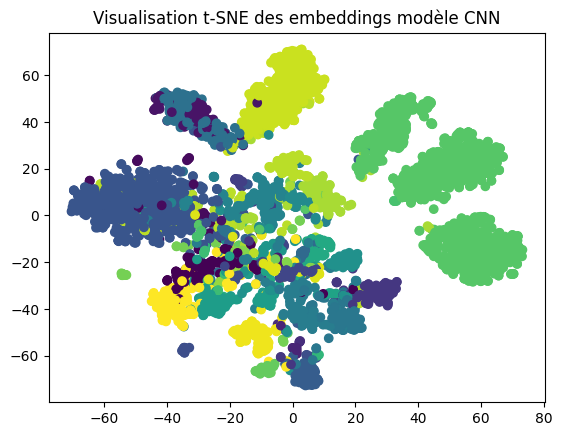

In [ ]:
from sklearn.manifold import TSNE
cnn_embeddings = df_cnn["embeddings"]
X = np.vstack(cnn_embeddings.values).astype(float)

labels = df_aug["category2_code"]
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
emb_2d = tsne.fit_transform(X)

plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels_encoded)
plt.title("Visualisation t-SNE des embeddings modèle CNN")
plt.show()

## Modèle 2 : Pré-entrainé (ResNet50)

### Imports Spécifiques + Config

In [ ]:
import os
import numpy as np
from tqdm import tqdm

from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.utils import load_img, img_to_array

In [ ]:
# Dossier où sont les images redimensionnées
IMG_DIR = "Images_aug"

# Taille d'entrée pour ResNet50 (les images sont déjà en 256x256)
IMG_SIZE = (256, 256)

### Construction de la liste des chemins d'images

In [ ]:
# Vérification rapide
df_images.head()

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,title_len
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455.jpg,53
1,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X08101S221254MOCCI/schmetterlingsbrille-mit-blaulichtfilter-schwarz/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/butterfly-blue-light-glasses-black-acetate-acetate-packshot-default-a71441x08101s2212-8853207154718.jpg",420.0,PA71441.jpg,7
2,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X09950L241361NUNI/quadratische-sonnenbrille-silberfarben/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/square-sunglasses-silver-titanium-titanium-packshot-default-a71449x09950l2413-8853170782238.jpg",580.0,PA71449.jpg,40
3,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X01081S856100POCCI/umschliessende-sonnenbrille-blau-rosa/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/shield-sunglasses-blue-pink-acetate-acetate-packshot-default-a71466x01081s8561-8850450087966.jpg",480.0,PA71466.jpg,38
4,EYEWEAR,SUNGLASSES,PA71481,Schwarz. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71481X02123S221652ROCCI/quadratische-sonnenbrille-schwarz/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/square-sunglasses-black-acetate-calfskin-acetate-calfskin-packshot-default-a71481x02123s2216-8857337397278.jpg",620.0,PA71481.jpg,34


In [ ]:
# Liste des noms de fichiers et chemins complets vers les images
image_filenames = df_aug["image"].tolist()
image_paths = [os.path.join(IMG_DIR, fname) for fname in image_filenames]

print("Nombre d'images :", len(image_paths))
print("Exemple de chemins :", image_paths[:3])

Nombre d'images : 4500
Exemple de chemins : ['Images_aug\\PAS4152B13455_0.jpg', 'Images_aug\\PAS4152B13455_1.jpg', 'Images_aug\\PAS4152B13455_2.jpg']


### Chargement ResNet50 pré-entraîné comme extracteur de features

In [ ]:
# Modèle ResNet50 pré-entraîné sur ImageNet
# include_top=False : on retire la tête de classification
# pooling='avg' : on récupère un vecteur global (2048 dimensions) par image
resnet_model = ResNet50(
    include_top=False,
    weights="imagenet",
    pooling="avg"
)

resnet_model.trainable = False  # on ne fine-tune pas, juste extraction de features

resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

### Extraction des embeddings pour toutes les images

Dataset petit, donc :

In [ ]:
embeddings = []

for img_path in tqdm(image_paths, desc="Extraction embeddings ResNet50"):
    # Charger l'image et la redimensionner à IMG_SIZE
    img = load_img(img_path, target_size=IMG_SIZE)  # PIL Image
    x = img_to_array(img)                           # -> (H, W, 3)
    x = np.expand_dims(x, axis=0)                   # -> (1, H, W, 3)
    x = preprocess_input(x)                         # prétraitement ResNet50

    # Prédiction : vecteur de features de dimension 2048
    feat = resnet_model.predict(x, verbose=0)       # -> (1, 2048)
    embeddings.append(feat[0])                      # -> (2048,)

embeddings = np.array(embeddings, dtype="float32")
print("Shape des embeddings :", embeddings.shape)   # (n_images, 2048)


Extraction embeddings ResNet50: 100%|██████████| 4500/4500 [08:14<00:00,  9.10it/s]

Shape des embeddings : (4500, 2048)


### On met les embeddings dans un DataFrame + méta-données

In [ ]:
# Colonnes pour les 2048 dimensions
emb_cols = [f"resnet50_{i}" for i in range(embeddings.shape[1])]
emb_resnet = pd.DataFrame(embeddings, columns=emb_cols)

# Ajouter les méta-données alignées avec df_images
emb_resnet["product_code"]   = df_aug["product_code"].values
emb_resnet["category2_code"] = df_aug["category2_code"].values
emb_resnet["title"]          = df_aug["title"].values
emb_resnet["image"]          = df_aug["image"].values

emb_resnet.head()

,resnet50_0,resnet50_1,resnet50_2,resnet50_3,resnet50_4,resnet50_5,resnet50_6,resnet50_7,resnet50_8,resnet50_9,...,resnet50_2042,resnet50_2043,resnet50_2044,resnet50_2045,resnet50_2046,resnet50_2047,product_code,category2_code,title,image
0,0.055496,0.092753,0.000000,0.0,0.243746,0.056423,0.068512,0.401380,0.029446,0.003728,...,0.081419,0.0,0.026214,0.000000,0.746110,0.031610,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_0.jpg
1,0.075819,0.293984,0.000000,0.0,0.102620,0.003129,0.377635,0.427666,0.040157,0.005365,...,0.148257,0.0,0.072562,0.014574,0.974171,0.207582,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_1.jpg
2,0.085455,0.061201,0.000000,0.0,0.300331,0.027423,0.020327,0.922061,0.042618,0.024852,...,0.000000,0.0,0.060215,0.189791,1.072134,0.007122,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_2.jpg
3,0.011993,0.217101,0.000000,0.0,0.296539,0.013997,0.033655,0.679672,0.137356,0.037745,...,0.051846,0.0,0.023199,0.206214,0.869004,0.003653,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_3.jpg
4,0.110392,0.096051,0.006643,0.0,0.160226,0.083816,0.012553,0.319881,0.000000,0.051822,...,0.185351,0.0,0.016196,0.005502,0.449068,0.003202,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_4.jpg


On a créé un DataFrame emb_resnet qui contient les 2048 features et des infos utiles pour la suite (product_code, category2_code, title, image).

In [ ]:
emb_resnet.to_parquet("Embeddings/resnet50_image_embeddings.parquet")

Affichage des embeddings

In [ ]:
df_resnet50 = pd.read_parquet('Embeddings/resnet50_image_embeddings.parquet')
df_resnet50.head()

,resnet50_0,resnet50_1,resnet50_2,resnet50_3,resnet50_4,resnet50_5,resnet50_6,resnet50_7,resnet50_8,resnet50_9,...,resnet50_2042,resnet50_2043,resnet50_2044,resnet50_2045,resnet50_2046,resnet50_2047,product_code,category2_code,title,image
0,0.055496,0.092753,0.000000,0.0,0.243746,0.056423,0.068512,0.401380,0.029446,0.003728,...,0.081419,0.0,0.026214,0.000000,0.746110,0.031610,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_0.jpg
1,0.075819,0.293984,0.000000,0.0,0.102620,0.003129,0.377635,0.427666,0.040157,0.005365,...,0.148257,0.0,0.072562,0.014574,0.974171,0.207582,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_1.jpg
2,0.085455,0.061201,0.000000,0.0,0.300331,0.027423,0.020327,0.922061,0.042618,0.024852,...,0.000000,0.0,0.060215,0.189791,1.072134,0.007122,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_2.jpg
3,0.011993,0.217101,0.000000,0.0,0.296539,0.013997,0.033655,0.679672,0.137356,0.037745,...,0.051846,0.0,0.023199,0.206214,0.869004,0.003653,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_3.jpg
4,0.110392,0.096051,0.006643,0.0,0.160226,0.083816,0.012553,0.319881,0.000000,0.051822,...,0.185351,0.0,0.016196,0.005502,0.449068,0.003202,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_4.jpg


In [ ]:
emb_cols = [col for col in df_resnet50.columns if col.startswith("resnet50_")]

df_resnet50["embeddings"] = df_resnet50[emb_cols].values.tolist()

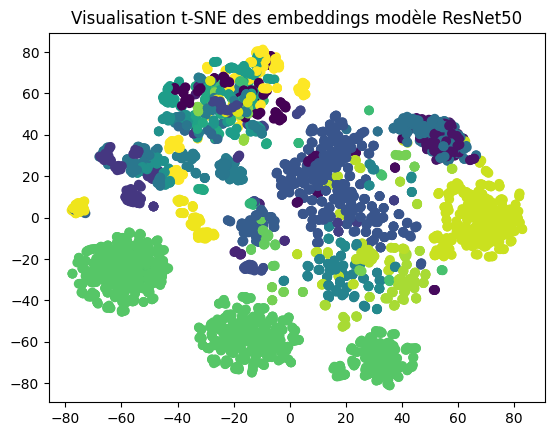

In [ ]:
resnet_embeddings = df_resnet50["embeddings"]
X = np.vstack(resnet_embeddings.values).astype(float)

labels = df_resnet50["category2_code"]
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
emb_2d = tsne.fit_transform(X)

plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels_encoded)
plt.title("Visualisation t-SNE des embeddings modèle ResNet50")
plt.show()

## Méthode 3 : Self-supervised learning

In [ ]:
df_simsiam = pd.read_parquet('Embeddings/simsiam_cnn_image_embeddings.parquet')
df_simsiam.head()

,simsiam_0,simsiam_1,simsiam_2,simsiam_3,simsiam_4,simsiam_5,simsiam_6,simsiam_7,simsiam_8,simsiam_9,...,simsiam_122,simsiam_123,simsiam_124,simsiam_125,simsiam_126,simsiam_127,product_code,category2_code,title,image
0,0.0,8.156460,0.0,18.893824,30.099773,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_0.jpg
1,0.0,6.311546,0.0,15.000208,23.600010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_1.jpg
2,0.0,8.252757,0.0,19.081810,30.248184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_2.jpg
3,0.0,7.123237,0.0,16.556910,26.602762,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_3.jpg
4,0.0,9.555816,0.0,22.429686,35.548306,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,PAS4152B13455,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,PAS4152B13455_4.jpg


In [ ]:
emb_cols = [col for col in df_simsiam.columns if col.startswith("simsiam_")]

df_simsiam["embeddings"] = df_simsiam[emb_cols].values.tolist()

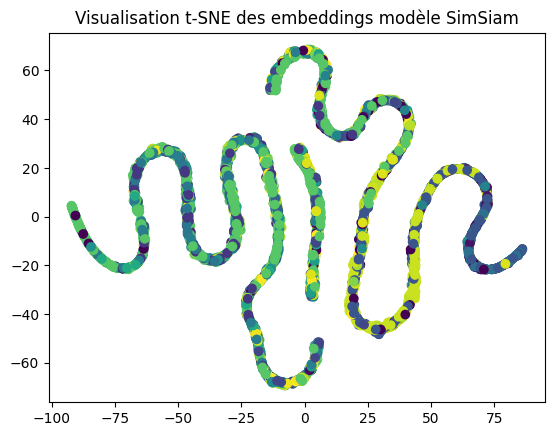

In [ ]:
simsiam_embeddings = df_simsiam["embeddings"]
X = np.vstack(simsiam_embeddings.values).astype(float)

labels = df_simsiam["category2_code"]
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
emb_2d = tsne.fit_transform(X)

plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels_encoded)
plt.title("Visualisation t-SNE des embeddings modèle SimSiam")
plt.show()

### Comparaison coherence intra-classe et inter-classe du modele CNN et ResNet50

In [ ]:
from sklearn.metrics import pairwise_distances

# Embeddings CNN : colonnes cnn_0, cnn_1, ...
cnn_cols = [c for c in emb_cnn.columns if c.startswith("cnn_")]
X_cnn = emb_cnn[cnn_cols].values
y = emb_cnn["category2_code"].values

# Embeddings ResNet50 : colonnes resnet50_0, ...
res_cols = [c for c in emb_resnet.columns if c.startswith("resnet50_")]
X_res = emb_resnet[res_cols].values


In [ ]:
def compute_intra_inter_distances(X, y):
    categories = np.unique(y)
    intra = {}
    inter = []

    for cat in categories:
        X_cat = X[y == cat]
        if len(X_cat) > 1:
            D = pairwise_distances(X_cat)
            intra[cat] = np.mean(D)
        else:
            intra[cat] = np.nan

    for i, c1 in enumerate(categories):
        for c2 in categories[i+1:]:
            D = pairwise_distances(
                X[y == c1], 
                X[y == c2]
            )
            inter.append(np.mean(D))

    return intra, np.mean(inter)


In [ ]:
intra_cnn, inter_cnn = compute_intra_inter_distances(X_cnn, y)
intra_res, inter_res = compute_intra_inter_distances(X_res, y)

print("=== COHÉRENCE INTRA-CLASSE ===")
print(f"CNN      : {np.nanmean(list(intra_cnn.values())):.4f}")
print(f"ResNet50 : {np.nanmean(list(intra_res.values())):.4f}")

print("\n=== DISTANCE INTER-CLASSE ===")
print(f"CNN      : {inter_cnn:.4f}")
print(f"ResNet50 : {inter_res:.4f}")


## Partie 3 : Analyse et comparaison des embeddings textuels

### 1. Traduction des descriptions

Ici les titres sont en anglais, on va utiliser google tanslate pour les traduire et rajouter une colonne à notre dataset

In [ ]:
df_images['title'].value_counts()

title
Schwarz. Gläser: Grau  Mit Verlauf                           17
Schwarz                                                      13
Schwarz. Gläser: Transparent                                 11
18 Karat Weißgold  Diamanten                                 10
Schwarz. Gläser: Grau                                         9
                                                             ..
Veränderbares langes Collier  18 Karat Rotgold  Diamanten     1
Steppmotiv  Mini-Modell  18 Karat BEIGEGOLD  Diamanten        1
18 Karat Gelbgold  Diamant                                    1
Steppmotiv  kleines Modell  18 Karat Gelbgold  Diamanten      1
Rosa & Weiß. Gläser: Rosa                                     1
Name: count, Length: 596, dtype: int64

In [ ]:
!pip install deep_translator

In [ ]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

if os.path.exists('data_aug.csv') :
    df_aug = pd.read_csv('data_aug.csv')

else:

    translator = GoogleTranslator(source='auto', target='en')

    tqdm.pandas()

    # Étape 1 : trouver les titres uniques
    unique_titles = df_aug['title'].unique()

    # Étape 2 : traduire chaque titre unique
    translated_dict = {}
    for t in tqdm(unique_titles, desc="Traduction des titres uniques"):
        try:
            translated_dict[t] = translator.translate(t)
        except Exception as e:
            print(f"Erreur :{e}")
            translated_dict[t] = t

    # Étape 3 : mapper la traduction sur toutes les lignes
    df_aug['title_translated'] = df_aug['title'].map(translated_dict)

    # on sauvergarde
    df_aug.to_csv("data_aug.csv", index=False)

df_aug


,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,title_len,title_translated
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_0.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
1,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_1.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
2,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_2.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
3,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_3.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
4,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_4.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy
...,...,...,...,...,...,...,...,...,...,...
4495,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique-vue4-as4280b1369310601-9529173606430.jpg",5400.0,PAS4280B13693_0.jpg,38,Lambskin & Silver Metal White
4496,FASHION,HANDBAGS,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B1369310601/kleine-bowlingtasche-lammfell-silberfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/small-bowling-bag-white-shearling-lambskin-silver-tone-metal-shearling-lambskin-silver-tone-metal-packshot-artistique

#### Nettoyage des titres

In [ ]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", " ", text)
    words = text.split(' ')
    list_stopwords = stopwords.words('english') + ['']
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(ele, 'v') for ele in words if ele not in list_stopwords]
    return " ".join(words)

In [ ]:
df_aug['title_cleaned'] = df_aug['title_translated'].apply(clean_text)

In [ ]:
df_aug.head()

,category1_code,category2_code,product_code,title,itemurl,imageurl,price,image,title_len,title_translated,title_cleaned
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_0.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy,tweed gold tone metal black pink burgundy
1,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_1.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy,tweed gold tone metal black pink burgundy
2,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_2.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy,tweed gold tone metal black pink burgundy
3,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_3.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy,tweed gold tone metal black pink burgundy
4,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & Bordeaux,https://www.chanel.com/de/mode/p/AS4152B13455NO249/kleine-pattentasche-tweed-goldfarbenes-metall/,"https://res.cloudinary.com/dwayrkp5z/image/fetch/h_400,w_400,c_fill_pad,g_auto,e_trim/https://www.chanel.com/images//t_one/q_auto:good,f_auto,fl_lossy,dpr_1.1/w_620/mini-flap-bag-black-pink-burgundy-tweed-gold-tone-metal-tweed-gold-tone-metal-packshot-artistique-vue2-as4152b13455no249-9524212989982.jpg",5200.0,PAS4152B13455_4.jpg,53,Tweed & Gold Tone Metal Black Pink & Burgundy,tweed gold tone metal black pink burgundy


### 2. Génération des embeddings textuels

In [ ]:
import sys
print(sys.version)
print(sys.executable)  # tu as déjà : python313

# Mise à jour vers la dernière version dispo
!{sys.executable} -m pip install tf-keras


3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
c:\Users\tgour\AppData\Local\Programs\Python\Python313\python.exe


In [ ]:
## !pip install tf-keras
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

descriptions = df_aug["title_cleaned"].tolist()

embeddings = model.encode(descriptions, show_progress_bar=True)

# On ajoute les embeddings au dataframe sous forme de liste
df_aug["embeddings"] = embeddings.tolist()


'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /sentence-transformers/all-MiniLM-L6-v2/resolve/main/modules.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002753529FA10>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 1dc8ef77-70d0-4956-a4da-e47d82f3f144)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /sentence-transformers/all-MiniLM-L6-v2/resolve/main/modules.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000277E42B1E50>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: e9a6381c-29eb-4cab-aed1-14fe6358c9ee)')' thrown while requesting HEAD https://huggingface.

Ils ont tous une taille de 384

In [ ]:
l = df_aug.embeddings.tolist()[0]
count = 0
for val in l:
    count += 1
print(count)

384


On visualise notre embedding

In [ ]:
df_aug['embeddings']

0               [-0.05787771940231323, 0.011802025139331818, -2.1336287318263203e-05, 0.058002978563308716, 0.00803217850625515, 0.008311031386256218, 0.14493818581104279, -0.03775612264871597, -0.015347135253250599, -0.08038760721683502, -0.04419247433543205, -0.01925380527973175, -0.008138245902955532, -0.063799649477005, -0.06244126334786415, 0.05263681709766388, 0.08705384284257889, -0.09246781468391418, 0.03482988849282265, 0.05476660281419754, -0.005551863927394152, -0.022194888442754745, 0.0019070584094151855, 0.02973712980747223, -0.10565399378538132, 0.05681120976805687, 0.007224885281175375, 0.022448400035500526, -0.028551658615469933, -0.100373275578022, 0.025015678256750107, 0.047145046293735504, 0.04480500519275665, -0.0066863917745649815, -0.070685975253582, -0.07556048780679703, 0.046889401972293854, 0.05360984429717064, -0.04284186661243439, 0.00962732918560505, -0.07664564251899719, 0.024098483845591545, -0.035188138484954834, -0.03314182907342911, -0.00899576209485530

Pour comparer nos embeddings on va comparer deux objets d'une meme categorie1 et deux objets d'une categorie2 similaire et differentes. Pour cela on fait deux fonctions

In [ ]:
from scipy.spatial.distance import cosine, euclidean
import random

def compare_embeddings_cat2(categorie1, categorie2, df):

    if categorie1 == categorie2:
        df_select1 = df[df['category2_code'] == categorie1]
        df_select2 = df_select1
    else:
        df_select1 = df[df['category2_code'] == categorie1]
        df_select2 = df[df['category2_code'] == categorie2]

    i = random.choice(df_select1.index)
    j = random.choice(df_select2.index)

    object1 = df_select1.loc[i, 'title_cleaned']
    object2 = df_select2.loc[j, 'title_cleaned']
    emb1 = df_select1.loc[i, 'embeddings']
    emb2 = df_select2.loc[j, 'embeddings']

    cos_sim = 1 - cosine(emb1, emb2)  # Similarité cosinus
    euc_dist = euclidean(emb1, emb2)  # Distance euclidienne

    print(f"Comparaison entre des objets des categories {categorie1} et {categorie2}:")
    print(f"  Description 1: {object1}")
    print(f"  Description 2: {object2}")
    print(f"  Cosine similarity: {cos_sim:.4f}")
    print(f"  Euclidean distance: {euc_dist:.4f}\n")


On a donc pour deux paires de lunettes une bonne similaritée. Cependant les embeddings sont sur les titres et non les catégories.

In [ ]:
compare_embeddings_cat2("SUNGLASSES", "SUNGLASSES", df_aug)

Comparaison entre des objets des categories SUNGLASSES et SUNGLASSES:
  Description 1: dark tortoiseshell lenses brown gradient
  Description 2: black lenses brown gradient
  Cosine similarity: 0.7622
  Euclidean distance: 0.6896



On réalise une deuxieme fonction afin de comparer des embeddings pour des objets d'une meme ou differente categrie1.

In [ ]:
def compare_embeddings_cat1(categorie1, categorie2, df):

    if categorie1 == categorie2:
        df_select1 = df[df['category1_code'] == categorie1]
        df_select2 = df_select1
    else:
        df_select1 = df[df['category1_code'] == categorie1]
        df_select2 = df[df['category1_code'] == categorie2]

    i = random.choice(df_select1.index)
    j = random.choice(df_select2.index)

    object1 = df_select1.loc[i, 'title_cleaned']
    object2 = df_select2.loc[j, 'title_cleaned']
    emb1 = df_select1.loc[i, 'embeddings']
    emb2 = df_select2.loc[j, 'embeddings']

    cos_sim = 1 - cosine(emb1, emb2)  # Similarité cosinus
    euc_dist = euclidean(emb1, emb2)  # Distance euclidienne

    print(f"Comparaison entre des objets des categories {categorie1} et {categorie2}:")
    print(f"  Description 1: {object1}")
    print(f"  Description 2: {object2}")
    print(f"  Cosine similarity: {cos_sim:.4f}")
    print(f"  Euclidean distance: {euc_dist:.4f}\n")


Rappel des categories

In [ ]:
df_aug['category1_code'].unique()

array(['FASHION', 'EYEWEAR', 'JEWELRY', 'MAKEUP', 'FRAGRANCE', 'WATCHES',
       'SKINCARE'], dtype=object)

In [ ]:
compare_embeddings_cat1("WATCHES", "EYEWEAR", df_aug)

Comparaison entre des objets des categories WATCHES et EYEWEAR:
  Description 1: stainless steel
  Description 2: dunkelgrün
  Cosine similarity: 0.1615
  Euclidean distance: 1.2950



On va maintenant s'interesser à la similarité des objets textuels entre deux categories de la classe categorie1

In [ ]:
import numpy as np
def compare_embeddings_cat1_mean(categorie1, categorie2, df):
    """
    Compare tous les embeddings d'une catégorie avec ceux d'une autre
    et retourne la similarité moyenne (cosine et distance euclidienne).
    """

    # Sélection des produits
    df1 = df[df['category1_code'] == categorie1]
    df2 = df[df['category1_code'] == categorie2]

    if len(df1) == 0 or len(df2) == 0:
        print("Une des catégories n'a pas de produits.")
        return

    cosine_sims = []
    euclidean_dists = []

    # Boucle sur tous les produits
    for emb1 in df1['embeddings']:
        for emb2 in df2['embeddings']:
            cosine_sims.append(1 - cosine(emb1, emb2))
            euclidean_dists.append(euclidean(emb1, emb2))

    # Moyennes
    mean_cosine = np.mean(cosine_sims)
    mean_euclidean = np.mean(euclidean_dists)

    print(f"Comparaison moyenne entre catégories {categorie1} et {categorie2}:")
    print(f"  Cosine similarity moyenne: {mean_cosine:.4f}")
    print(f"  Distance euclidienne moyenne: {mean_euclidean:.4f}\n")

    return mean_cosine, mean_euclidean


In [ ]:
compare_embeddings_cat1_mean("EYEWEAR", "EYEWEAR", df_aug)   # intra-catégorie

Comparaison moyenne entre catégories EYEWEAR et EYEWEAR:
  Cosine similarity moyenne: 0.4294
  Distance euclidienne moyenne: 1.0095



(np.float64(0.4294288588703315), np.float64(1.0094619076802378))

In [ ]:
compare_embeddings_cat1_mean("EYEWEAR", "FRAGRANCE", df_aug)  # inter-catégorie

Comparaison moyenne entre catégories EYEWEAR et FRAGRANCE:
  Cosine similarity moyenne: 0.0679
  Distance euclidienne moyenne: 1.3641



(np.float64(0.06791666529469609), np.float64(1.3641196479765112))

In [ ]:
def compare_embeddings_cat2_mean(categorie1, categorie2, df):
    """
    Compare tous les embeddings d'une catégorie avec ceux d'une autre
    et retourne la similarité moyenne (cosine et distance euclidienne).
    """

    # Sélection des produits
    df1 = df[df['category2_code'] == categorie1]
    df2 = df[df['category2_code'] == categorie2]

    if len(df1) == 0 or len(df2) == 0:
        print("Une des catégories n'a pas de produits.")
        return

    cosine_sims = []
    euclidean_dists = []

    # Boucle sur tous les produits
    for emb1 in df1['embeddings']:
        for emb2 in df2['embeddings']:
            cosine_sims.append(1 - cosine(emb1, emb2))
            euclidean_dists.append(euclidean(emb1, emb2))

    # Moyennes
    mean_cosine = np.mean(cosine_sims)
    mean_euclidean = np.mean(euclidean_dists)

    print(f"Comparaison moyenne entre catégories {categorie1} et {categorie2}:")
    print(f"  Cosine similarity moyenne: {mean_cosine:.4f}")
    print(f"  Distance euclidienne moyenne: {mean_euclidean:.4f}\n")

    return mean_cosine, mean_euclidean


In [ ]:
compare_embeddings_cat2_mean("SUNGLASSES", "SUNGLASSES", df_aug)  # intra-catégorie

Comparaison moyenne entre catégories SUNGLASSES et SUNGLASSES:
  Cosine similarity moyenne: 0.6737
  Distance euclidienne moyenne: 0.7584



(np.float64(0.6736650663321355), np.float64(0.7584278398898759))

In [ ]:
compare_embeddings_cat2_mean("SUNGLASSES", "WATCHES", df_aug)  # inter-catégorie

Comparaison moyenne entre catégories SUNGLASSES et WATCHES:
  Cosine similarity moyenne: 0.1519
  Distance euclidienne moyenne: 1.3013



(np.float64(0.1518550884709255), np.float64(1.3013424171501171))

### Visualisation des embeddings

In [ ]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

# Installer UMAP dans CE Python
!{sys.executable} -m pip install umap-learn

Python executable: c:\Users\tgour\AppData\Local\Programs\Python\Python313\python.exe
Python version: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.4 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.8 MB 1.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 2.2 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.8 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.0 MB/s  0:00:01
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.1 MB ? eta -:--:--
    --------------

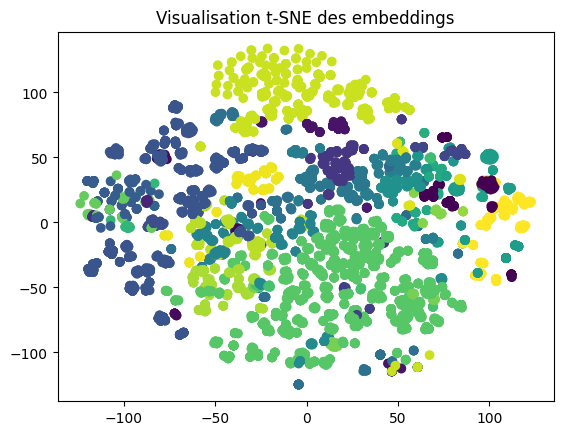

In [ ]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import Counter

X = np.vstack(df_aug['embeddings'].values).astype(float)

labels = df_aug["category2_code"]
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
emb_2d = tsne.fit_transform(X)

plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=labels_encoded)
plt.title("Visualisation t-SNE des embeddings")
plt.show()

#### Coefficient de corrélation

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

dist_img = pairwise_distances(np.vstack(df_images["embeddings"]))
dist_txt = pairwise_distances(np.vstack(df_aug["embeddings"]))

structure_corr = np.corrcoef(dist_img.flatten(), dist_txt.flatten())[0,1]
print(f"Coefficient : {structure_corr}")